# Análise exploratória de dados

In [118]:
### Import de bibliotecas para manipulação dos dados 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### para visualizacao 
import seaborn as sns

### para obter estatisticas de teste
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error

SyntaxError: invalid non-printable character U+00A0 (868888386.py, line 15)

## 1. Descrição dos dados

##### O dataset "Orange Quality Data.csv" contém 241 linhas e 11 colunas, e ele foi retirado dos datasets da kaggle. 
##### As variáveis incluem: 


* **Size (cm):** Diâmetro da laranja em centímetros, representando o tamanho da fruta.
* **Weight (g):** Peso da laranja em gramas, indicando a massa da fruta.
* **Brix (Sweetness):** Nível de açúcar da laranja, medido pela escala Brix, que indica o grau de doçura.
* **pH (Acidity):** Nível de acidez da laranja, medido pelo pH, que indica o sabor azedo da fruta.
* **Softness (1-5):** Nível de maciez da laranja em uma escala de 1 a 5, onde 1 indica uma fruta muito dura e 5 indica uma fruta muito macia.
* **HarvestTime (days):** Número de dias desde o plantio até a colheita, indicando o tempo de cultivo.
* **Ripeness (1-5):** Nível de maturação da laranja em uma escala de 1 a 5, onde 1 indica uma fruta verde e 5 indica uma fruta madura.
* **Color:** Cor da casca da laranja, indicando a variedade e o estágio de maturação.
* **Variety:** Variedade da laranja, como Valencia, Navel, Cara Cara, etc.
* **Blemishes (Y/N):** Indica se a laranja possui manchas ou defeitos visíveis (Sim ou Não).
* **Quality (1-5):** Qualidade geral da laranja em uma escala de 1 a 5, avaliando diversos atributos como tamanho, aparência, sabor e textura.

In [ ]:
#Caminho e leitura do Dataframe
df = pd.read_csv('../data/raw/Orange_Quality_Data.csv')

#Análise das 10 primeiras linhas 
df.head(10)

In [119]:
def  separador():
    print("=" * 50 + " ************** " + "=" * 50)
separador()

# Exibindo as informações do DataFrame
print(f"Informações gerais do DataFrame")
print(f" ")
df.info()
print(f" ")

separador()
print(f"Resumo estatístico")
print(f" ")
#Resumo estatístico
df.describe()

================================================== ************** ==================================================
Informações gerais do DataFrame
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
 11  color_encoded       241 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 22.7

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),color_encoded
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427,1.414938
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410,1.245837
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000,0.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000,0.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000,1.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000,3.000000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000,4.000000


In [120]:
# Caminho do dicionário dos dados .csv
csv_path = '../data/external/dicionario_de_dados_laranjas.csv'

# Leitura do CSV
df_dicionario_dados = pd.read_csv(csv_path, sep=';')
dicionario = df_dicionario_dados.loc[:, ~df_dicionario_dados.columns.str.contains('^Unnamed')]
print(dicionario)




   Variável ,Tradução ,Descrição ,Espectro de opções,Tipo ,Subtipo ,,           
0   Size (cm),Tamanho,Diâmetro da laranja em centí...                           
1   Weight (g),Peso,Peso da laranja em gramas,(100...                           
2   Brix (Sweetness),Doçura,Nível de açúcar da lar...                           
3   pH (Acidity),Acidez,Nível de acidez da laranja...                           
4   Softness ,Maciez,Nível de maciez da laranja em...                           
5   HarvestTime (days),Tempo de colheita,Número de...                           
6   Ripeness ,Maturação,Nível de maturação da lara...                           
7   Color,Cor,Cor da casca da laranja,"Orange, Dee...                           
8   Blemishes ,Manchas,Presença de manchas na lara...                           
9   Quality ,Qualidade,Qualidade geral da laranja ...                           
10  Variety,Variedade,Variedade da laranja,"Valenc...                           


## 2. Perguntas de partida e hipóteses

## a: Como a maciez das laranjas varia com o tempo de colheita e o estágio de maturação? Laranjas mais maduras são sempre mais macias?

## b: A cor das laranjas está relacionada à sua qualidade? Quais tonalidades são indicativas de maior qualidade?

Qualidade média por tonalidade de cor:
Color
Light Orange     3.281250
Orange           3.750000
Orange-Red       3.754545
Yellow-Orange    4.222222
Deep Orange      4.306667
Name: Quality (1-5), dtype: float64


/tmp/ipykernel_13228/1045420640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_quality.index, y=color_quality.values, palette="plasma")


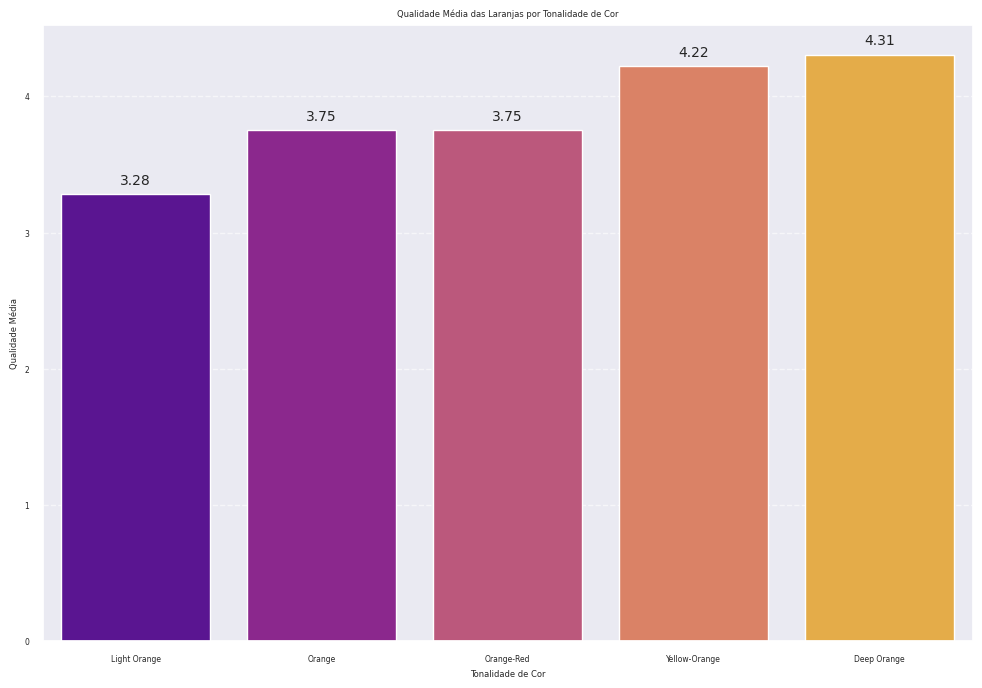

 
 
 
 
Correlação entre cor e qualidade: -0.12


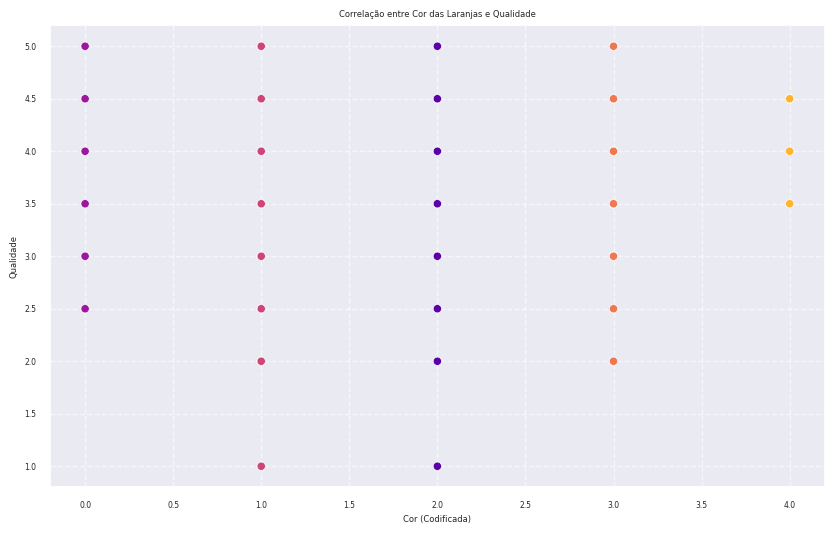


Tabela de Cores e Qualidade:
  Original Color  Encoded Color   Quality
0    Deep Orange              0  4.306667
1   Light Orange              1  3.281250
2         Orange              2  3.750000
3     Orange-Red              3  3.754545
4  Yellow-Orange              4  4.222222


' \nA correlação calculada é de -0.12.\nInterpretação dos Resultados\nQualidade Média: A análise mostra que a tonalidade Deep Orange apresenta a maior qualidade média (4.31), \nseguida por Yellow-Orange (4.22). Isso indica que as laranjas dessas cores tendem a ser avaliadas como de maior \nqualidade. Tonalidades Menores: As tonalidades Light Orange, Orange, e Orange-Red têm médias de qualidade inferiores \n(3.28 a 3.75), sugerindo que essas cores estão associadas a uma qualidade menor em comparação às tonalidades mais escuras.\nCorrelação Negativa: A correlação de -0.12 indica uma relação fraca e negativa entre a cor das laranjas e sua qualidade.\nIsso sugere que, embora existam variações na qualidade média entre as diferentes tonalidades, não há uma relação forte que\nindique que a cor mais intensa sempre resulta em maior qualidade.\n'

In [121]:
# Análise Exploratória da Relação entre Cor e Qualidade
# Calculando a média da qualidade para cada tonalidade de cor
color_quality = df.groupby('Color')['Quality (1-5)'].mean().sort_values()

# Exibindo a tabela de médias de qualidade por cor para melhor visualização 
print("Qualidade média por tonalidade de cor:")
print(color_quality)

# Gráfico de Barra Qualidade vs Tonalidade de Cor
plt.figure(figsize=(12, 8))
sns.barplot(x=color_quality.index, y=color_quality.values, palette="plasma")

# Configurações do Gráfico
plt.title('Qualidade Média das Laranjas por Tonalidade de Cor')
plt.xlabel('Tonalidade de Cor')
plt.ylabel('Qualidade Média')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando os valores em cima das barras
for index, value in enumerate(color_quality.values):
    plt.text(index, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=10)


# Exibir o gráfico
plt.show()

#Espaçamento para melhor visualização 
print(' ')
print(' ')
print(' ')
print(' ')

# Transformando a coluna 'color' em valores numéricos para utilizar a correlação
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['Color'])

# Cálculo da correlação entre cor e qualidade
correlation = df[['color_encoded', 'Quality (1-5)']].corr().iloc[0, 1]
print(f"Correlação entre cor e qualidade: {correlation:.2f}")

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='color_encoded', y='Quality (1-5)', data=df, palette="plasma", hue='Color', legend=False)

# Configurações do gráfico de dispersão
plt.title('Correlação entre Cor das Laranjas e Qualidade')
plt.xlabel('Cor (Codificada)')
plt.ylabel('Qualidade')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

# Exibir cores originais, codificadas e qualidade em tabela para melhor entendimento
color_mapping = pd.DataFrame({
    'Original Color': label_encoder.classes_,  # Cores originais
    'Encoded Color': range(len(label_encoder.classes_)),  # Cores codificadas
    'Quality': [df[df['Color'] == color]['Quality (1-5)'].mean() for color in label_encoder.classes_]  # Média da qualidade por cor
})

print("\nTabela de Cores e Qualidade:")
print(color_mapping)


#Insight
''' 
A correlação calculada é de -0.12.
Interpretação dos Resultados
Qualidade Média: A análise mostra que a tonalidade Deep Orange apresenta a maior qualidade média (4.31), 
seguida por Yellow-Orange (4.22). Isso indica que as laranjas dessas cores tendem a ser avaliadas como de maior 
qualidade. Tonalidades Menores: As tonalidades Light Orange, Orange, e Orange-Red têm médias de qualidade inferiores 
(3.28 a 3.75), sugerindo que essas cores estão associadas a uma qualidade menor em comparação às tonalidades mais escuras.
Correlação Negativa: A correlação de -0.12 indica uma relação fraca e negativa entre a cor das laranjas e sua qualidade.
Isso sugere que, embora existam variações na qualidade média entre as diferentes tonalidades, não há uma relação forte que
indique que a cor mais intensa sempre resulta em maior qualidade.
'''

## c: Qual é a influência das manchas na avaliação da qualidade das laranjas?

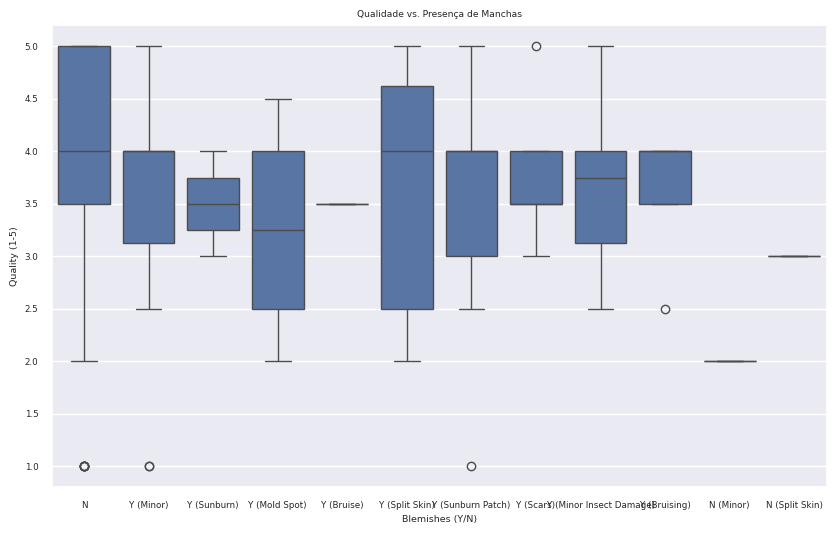

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blemishes (Y/N)', y='Quality (1-5)', data=df)
sns.set(font_scale=0.55)
plt.title('Qualidade vs. Presença de Manchas')
plt.show()

* Impacto das manchas na qualidade: É evidente que a presença de manchas, independentemente do tipo, tende a reduzir a qualidade geral das laranjas. As laranjas classificadas como "N" (sem manchas) apresentam, em geral, uma qualidade superior quando comparadas às laranjas com qualquer tipo de mancha.

* Variabilidade entre os tipos de manchas: Os diferentes tipos de manchas não impactam a qualidade de forma uniforme. Algumas categorias de manchas parecem ter um efeito mais pronunciado na redução da qualidade do que outras. Por exemplo, as laranjas com "Split Skin" (pele rachada) apresentam uma qualidade significativamente menor em comparação com a média geral.

* Manchas menores: As categorias "Y (Minor)" e "N (Minor)" indicam a presença de manchas menores. A qualidade dessas laranjas, embora seja menor do que a das laranjas sem manchas, ainda é relativamente alta. Isso sugere que manchas menores podem ter um impacto menos significativo na qualidade geral.

* Manchas mais severas: Categorias como "Y (Split Skin)" e "Y (Bruise)" indicam danos mais severos à casca da laranja. Essas laranjas apresentam uma qualidade significativamente menor, o que indica que danos mais extensos à casca podem comprometer a qualidade interna da fruta.

* Outros tipos de manchas: Os outros tipos de manchas (como "Y (Sunburn)", "Y (Mold Spot)", etc.) também parecem ter um impacto negativo na qualidade, embora em diferentes graus.

## d: Como o tempo de colheita afeta as características das laranjas? Existem períodos ideais para a colheita que maximizam a qualidade?

In [123]:
#Coloque seu código aqui 

## e: A presença de manchas afeta o pH ou a doçura das laranjas? Isso poderia indicar alguma relação entre defeitos visuais e características internas da fruta.

In [124]:
#Coloque seu código aqui 

## 3. Insights